**`>>> 作者：东南有大树；公众号：大树投研。`**

---

### 本节概要

- 双均线策略编写
- 数据可视化

*备注：本节所使用的数据文件000001.csv，可在公号中获取！*

In [1]:
import numpy as np
import pandas as pd

### 双均线策略概论

- 定义快速均线与慢速均线。
- 当快速均线止穿慢速均线，即形成金叉的时候，买入；当快速均线下穿慢速均线，即形成死叉的时候，卖出。
- 买入时间为当天收盘时。

#### 平安银行图例：

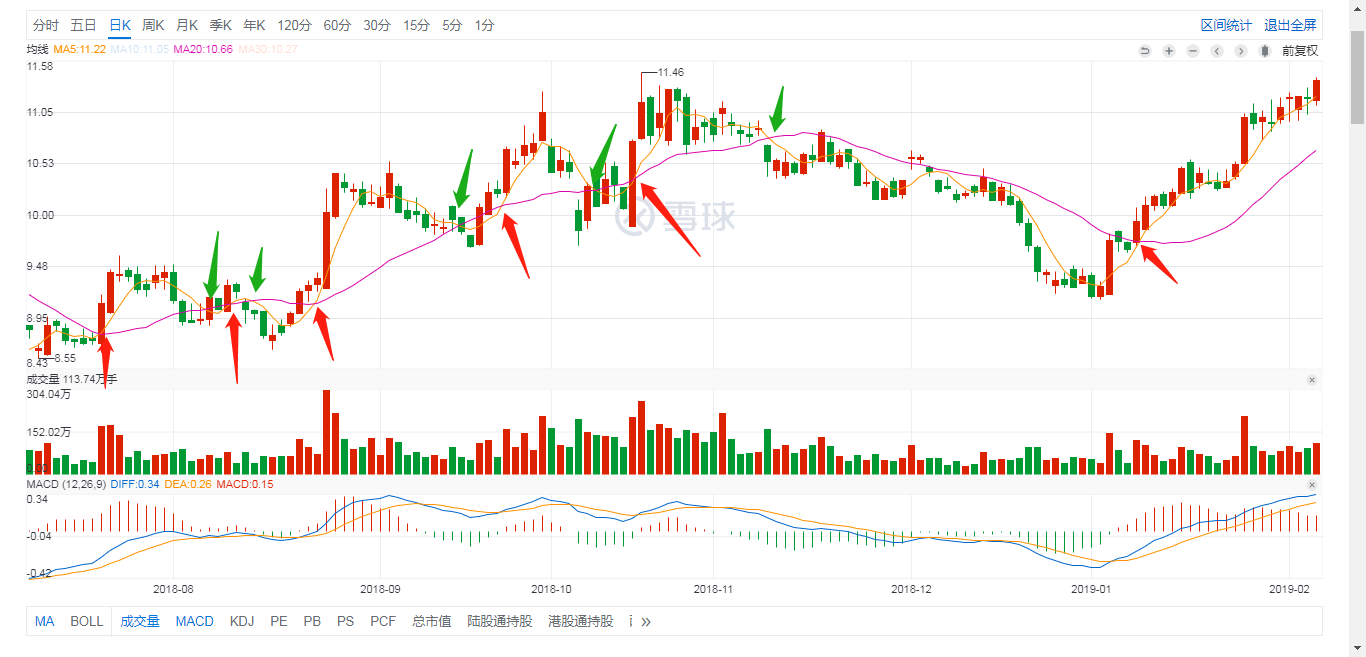

这是在雪球上的一个截图，我用红色箭头标出了买点，即金叉；用绿色箭头标出了卖点，即死叉。

### 读取数据

In [2]:
price = pd.read_csv('000001.csv', index_col='date')  # 读取平安银行价格数据
price.head(10)

,open,close,low,high,volume,money,factor,high_limit,low_limit,avg,pre_close,paused
date,,,,,,,,,,,,
2015/5/4,13.31,13.17,12.98,13.31,179078291,2.351547e+09,0.797179,14.64,11.98,13.13,13.31,0
2015/5/5,13.08,12.64,12.36,13.17,288434710,3.685372e+09,0.797179,14.48,11.85,12.78,13.17,0
2015/5/6,12.61,12.53,12.35,12.99,244601318,3.107566e+09,0.797179,13.91,11.38,12.71,12.64,0
2015/5/7,12.53,12.49,12.36,12.66,157895161,1.968942e+09,0.797179,13.78,11.28,12.47,12.53,0
2015/5/8,12.52,12.64,12.36,12.74,172416482,2.163109e+09,0.797179,13.74,11.24,12.55,12.49,0
2015/5/11,12.60,12.78,12.35,12.85,266323689,3.349067e+09,0.797179,13.90,11.38,12.57,12.64,0
2015/5/12,12.74,12.72,12.48,12.90,249586957,3.166864e+09,0.797179,14.05,11.50,12.69,12.78,0
2015/5/13,12.90,12.66,12.55,12.95,220347120,2.807446e+09,0.797179,14.00,11.45,12.74,12.72,0
2015/5/14,12.75,12.67,12.51,12.79,180389494,2.283605e+09,0.797179,13.93,11.39,12.66,12.66,0


### 计算n日均线

使用 mean() 函数求平均值

In [3]:
# 求五日均线的示例
ma_list = list()
close_series = price['close']
for i in range(5, len(close_series)):
    ma = close_series[i-5:i].mean()
    ma_list.append(ma)
df_ma = pd.DataFrame(ma_list, columns=['ma'])
df_ma.head(10)

,ma
0,12.694
1,12.616
2,12.632
3,12.658
4,12.694
5,12.630
6,12.494
7,12.436
8,12.414
9,12.398


使用 rolling() 函数，简化操作

In [4]:
value = price['close'].rolling(5).mean()
value.head(10)

date
2015/5/4        NaN
2015/5/5        NaN
2015/5/6        NaN
2015/5/7        NaN
2015/5/8     12.694
2015/5/11    12.616
2015/5/12    12.632
2015/5/13    12.658
2015/5/14    12.694
2015/5/15    12.630
Name: close, dtype: float64

In [5]:
df_ma = pd.DataFrame()
df_ma['ma5'] = price['close'].rolling(5).mean()
df_ma['ma20'] = price['close'].rolling(20).mean()
df_ma.tail(10)

,ma5,ma20
date,,
2019/2/28,12.210,11.4310
2019/3/1,12.454,11.5190
2019/3/4,12.542,11.6215
2019/3/5,12.714,11.7245
2019/3/6,12.850,11.8310
2019/3/7,12.926,11.9130
2019/3/8,12.834,11.9680
2019/3/11,12.700,12.0235
2019/3/12,12.560,12.0820


使用 plot() 函数可视化均线图

In [6]:
df_ma[['ma5', 'ma20']].plot(figsize = (20, 7), subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1143cb518>,
      dtype=object)

### 计算金叉与死叉位置

使用循环来计算

In [7]:
df_ma.shape

(943, 2)

In [8]:
for i in range(21, df_ma.shape[0]):
    # 求上一个交易日的均线值
    ma_fast_yesterday = df_ma['ma5'][i-1]
    ma_slow_yesterday = df_ma['ma20'][i-1]
    
    # 当日收盘后的均线值
    ma_fast_today = df_ma['ma5'][i]
    ma_slow_today = df_ma['ma20'][i]
    
    # 求金叉
    if ma_fast_yesterday < ma_slow_yesterday and ma_fast_today > ma_slow_today:
        print(price.index[i], '金叉形成')
    elif ma_fast_yesterday > ma_slow_yesterday and ma_fast_today < ma_slow_today:
        print(price.index[i], '死叉形成')

2015/6/2 死叉形成
2015/6/5 金叉形成
2015/6/17 死叉形成
2015/9/22 金叉形成
2015/9/23 死叉形成
2015/10/13 金叉形成
2015/11/27 死叉形成
2015/12/21 金叉形成
2015/12/31 死叉形成
2016/2/22 金叉形成
2016/2/29 死叉形成
2016/3/4 金叉形成
2016/4/22 死叉形成
2016/5/5 金叉形成
2016/5/6 死叉形成
2016/6/1 金叉形成
2016/9/7 死叉形成
2016/10/24 金叉形成
2016/11/4 死叉形成
2016/11/11 金叉形成
2016/12/15 死叉形成
2017/1/12 金叉形成
2017/3/7 死叉形成
2017/5/25 金叉形成
2017/8/11 死叉形成
2017/8/25 金叉形成
2017/9/19 死叉形成
2017/10/12 金叉形成
2017/10/26 死叉形成
2017/10/30 金叉形成
2017/11/6 死叉形成
2017/11/7 金叉形成
2017/12/5 死叉形成
2017/12/22 金叉形成
2018/1/9 死叉形成
2018/1/12 金叉形成
2018/2/1 死叉形成
2018/2/6 金叉形成
2018/2/7 死叉形成
2018/4/12 金叉形成
2018/5/3 死叉形成
2018/7/20 金叉形成
2018/8/7 死叉形成
2018/8/10 金叉形成
2018/8/14 死叉形成
2018/8/23 金叉形成
2018/9/14 死叉形成
2018/9/21 金叉形成
2018/10/15 死叉形成
2018/10/22 金叉形成
2018/11/12 死叉形成
2019/1/10 金叉形成


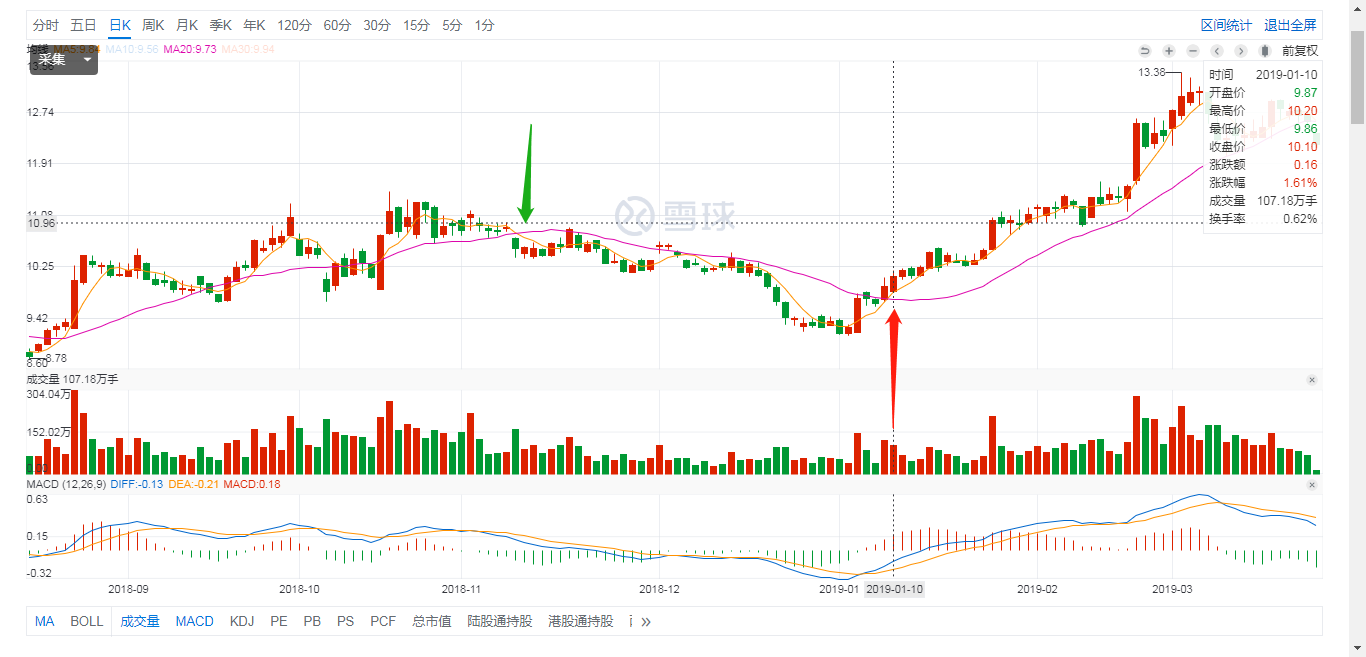

使用 shift() 函数简化计算

In [9]:
print(df_ma['ma5'].head(10))

date
2015/5/4        NaN
2015/5/5        NaN
2015/5/6        NaN
2015/5/7        NaN
2015/5/8     12.694
2015/5/11    12.616
2015/5/12    12.632
2015/5/13    12.658
2015/5/14    12.694
2015/5/15    12.630
Name: ma5, dtype: float64


In [10]:
print(df_ma['ma5'].shift(1).head(10))

date
2015/5/4        NaN
2015/5/5        NaN
2015/5/6        NaN
2015/5/7        NaN
2015/5/8        NaN
2015/5/11    12.694
2015/5/12    12.616
2015/5/13    12.632
2015/5/14    12.658
2015/5/15    12.694
Name: ma5, dtype: float64


使用 pandas 计算

In [11]:
df_new = pd.DataFrame()
df_new['ma_fast_today'] = df_ma['ma5']
df_new['ma_slow_today'] = df_ma['ma20']
df_new['value_today'] = df_new['ma_fast_today'] - df_new['ma_slow_today']
df_new['value_yesterday'] = df_new['value_today'].shift(1)
_df_gold = df_new[(df_new['value_yesterday'] < 0) & (df_new['value_today'] > 0)]
_df_death = df_new[(df_new['value_yesterday'] > 0) & (df_new['value_today'] < 0)]
df_new['cross'] = np.NaN
df_new.loc[_df_gold.index, 'cross'] = 'gold_cross'
df_new.loc[_df_death.index, 'cross'] = 'death_cross'
df_new[~df_new['cross'].isnull()].tail(10)

,ma_fast_today,ma_slow_today,value_today,value_yesterday,cross
date,,,,,
2018/8/7,9.022,9.0510,-0.0290,0.0375,death_cross
2018/8/10,9.136,9.1090,0.0270,-0.0195,gold_cross
2018/8/14,9.124,9.1390,-0.0150,0.0330,death_cross
2018/8/23,9.138,9.1025,0.0355,-0.0750,gold_cross
2018/9/14,9.894,9.9135,-0.0195,0.0660,death_cross
2018/9/21,10.182,10.1135,0.0685,-0.0655,gold_cross
2018/10/15,10.256,10.2580,-0.0020,0.0710,death_cross
2018/10/22,10.540,10.4195,0.1205,-0.0220,gold_cross
2018/11/12,10.730,10.8050,-0.0750,0.0195,death_cross


### 买入与卖出

In [96]:
cash = Cash = 100000

df_order = df_new.copy()
df_order['close'] = price['close']
df_order['hold_count'] = np.NaN
df_order['cash'] = np.NaN
_df = df_order[~df_order['cross'].isnull()]
_df.head()

,ma_fast_today,ma_slow_today,value_today,value_yesterday,cross,close,hold_count,cash
date,,,,,,,,
2015/6/2,12.592,12.6445,-0.0525,0.0800,death_cross,12.57,NaN,NaN
2015/6/5,12.782,12.6945,0.0875,-0.0510,gold_cross,12.99,NaN,NaN
2015/6/17,12.800,12.9140,-0.1140,0.0375,death_cross,12.54,NaN,NaN
2015/9/22,8.654,8.6315,0.0225,-0.0610,gold_cross,8.74,NaN,NaN
2015/9/23,8.622,8.6455,-0.0235,0.0225,death_cross,8.53,NaN,NaN


In [97]:
if _df['cross'][0] == 'death_cross':
    _df = _df.drop(_df.index[0])
_df.head()

,ma_fast_today,ma_slow_today,value_today,value_yesterday,cross,close,hold_count,cash
date,,,,,,,,
2015/6/5,12.782,12.6945,0.0875,-0.0510,gold_cross,12.99,NaN,NaN
2015/6/17,12.800,12.9140,-0.1140,0.0375,death_cross,12.54,NaN,NaN
2015/9/22,8.654,8.6315,0.0225,-0.0610,gold_cross,8.74,NaN,NaN
2015/9/23,8.622,8.6455,-0.0235,0.0225,death_cross,8.53,NaN,NaN
2015/10/13,8.680,8.6155,0.0645,-0.0505,gold_cross,8.87,NaN,NaN


In [98]:
for _index in _df.index:
    # 判断是金叉还是死叉
    if _df.loc[_index, 'cross'] == 'gold_cross':
        hand = cash // (_df.loc[_index, 'close'] * 100)
        cash -= hand * 100 * _df.loc[_index, 'close']
        _df.loc[_index, 'cash'] = cash
        df_order.loc[_index, 'cash'] = cash
        _df.loc[_index, 'hold_count'] = hand * 100
        df_order.loc[_index, 'hold_count'] = hand * 100
    elif _df.loc[_index, 'cross'] == 'death_cross':
        count = _df.shift(1).loc[_index, 'hold_count']
        cash += count * _df.loc[_index, 'close']
        _df.loc[_index, 'cash'] = cash
        df_order.loc[_index, 'cash'] = cash
        _df.loc[_index, 'hold_count'] = 0
        df_order.loc[_index, 'hold_count'] = 0
_df.head(10)

,ma_fast_today,ma_slow_today,value_today,value_yesterday,cross,close,hold_count,cash
date,,,,,,,,
2015/6/5,12.782,12.6945,0.0875,-0.0510,gold_cross,12.99,7600.0,1276.0
2015/6/17,12.800,12.9140,-0.1140,0.0375,death_cross,12.54,0.0,96580.0
2015/9/22,8.654,8.6315,0.0225,-0.0610,gold_cross,8.74,11000.0,440.0
2015/9/23,8.622,8.6455,-0.0235,0.0225,death_cross,8.53,0.0,94270.0
2015/10/13,8.680,8.6155,0.0645,-0.0505,gold_cross,8.87,10600.0,248.0
2015/11/27,9.726,9.7465,-0.0205,0.1240,death_cross,9.35,0.0,99358.0
2015/12/21,9.664,9.6335,0.0305,-0.0370,gold_cross,9.97,9900.0,655.0
2015/12/31,9.658,9.6665,-0.0085,0.0295,death_cross,9.56,0.0,95299.0
2016/2/22,8.062,8.0355,0.0265,-0.0585,gold_cross,8.20,11600.0,179.0


In [99]:
df_order.head(50)

,ma_fast_today,ma_slow_today,value_today,value_yesterday,cross,close,hold_count,cash
date,,,,,,,,
2015/5/4,NaN,NaN,NaN,NaN,NaN,13.17,NaN,NaN
2015/5/5,NaN,NaN,NaN,NaN,NaN,12.64,NaN,NaN
2015/5/6,NaN,NaN,NaN,NaN,NaN,12.53,NaN,NaN
2015/5/7,NaN,NaN,NaN,NaN,NaN,12.49,NaN,NaN
2015/5/8,12.694,NaN,NaN,NaN,NaN,12.64,NaN,NaN
2015/5/11,12.616,NaN,NaN,NaN,NaN,12.78,NaN,NaN
2015/5/12,12.632,NaN,NaN,NaN,NaN,12.72,NaN,NaN
2015/5/13,12.658,NaN,NaN,NaN,NaN,12.66,NaN,NaN
2015/5/14,12.694,NaN,NaN,NaN,NaN,12.67,NaN,NaN


### 整合df_order

In [100]:
df_order['hold_count'] = df_order['hold_count'].fillna(method = 'pad')
df_order['hold_count'] = df_order['hold_count'].fillna(value = 0)
# df_order.head(50)

In [102]:
df_order['cash'] = df_order['cash'].fillna(method='pad')
df_order['cash'] = df_order['cash'].fillna(value=100000)
# df_order.head(50)

In [104]:
df_order['price'] = df_order['hold_count'] * df_order['close'] + df_order['cash']
# df_order.head(50)

### 可视化资金曲线

113851.00000000001


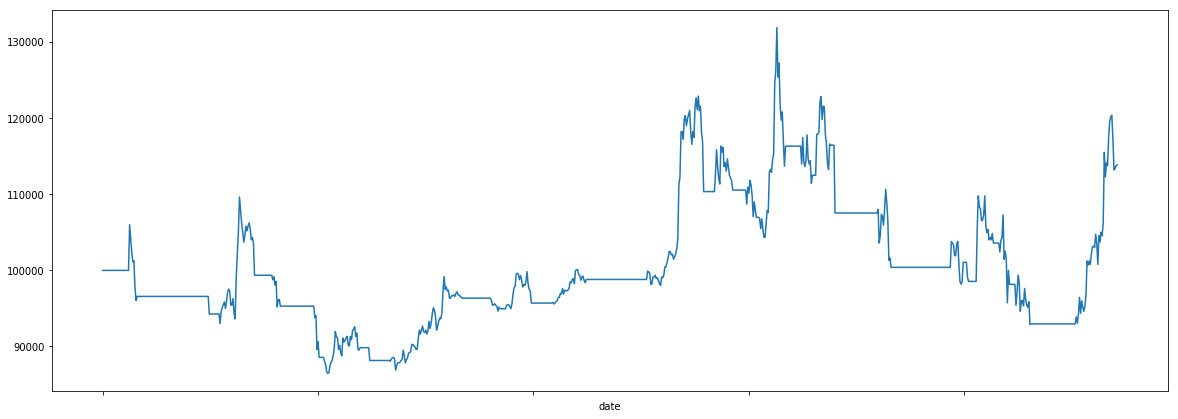

In [106]:
df_order['price'].plot(figsize=(20, 7))
print(df_order['price'][-1])

### 可视化收益率曲线

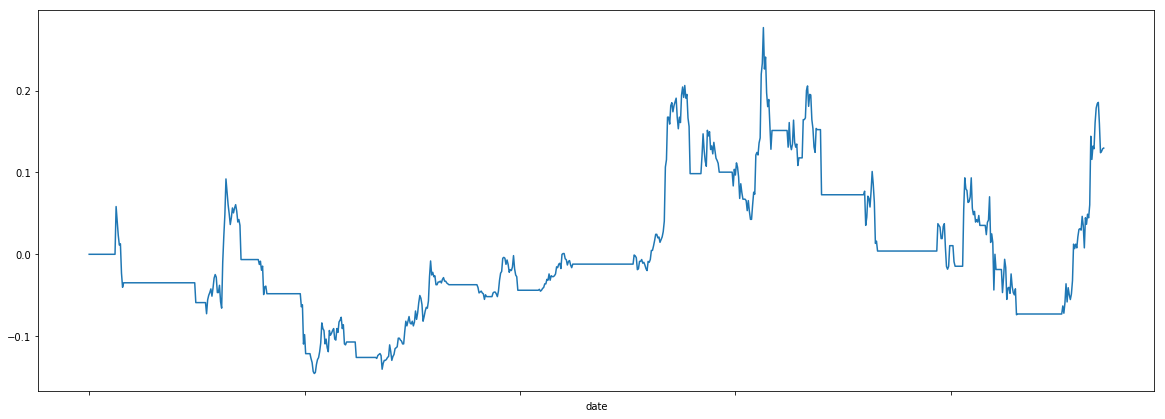

In [113]:
# value = (df_order['price'] - Cash) / Cash
# value.plot(figsize=(20, 7))

value = np.log(df_order['price'] / Cash)
value.plot(figsize=(20, 7))

### 将策略收益与基准收益进行对比

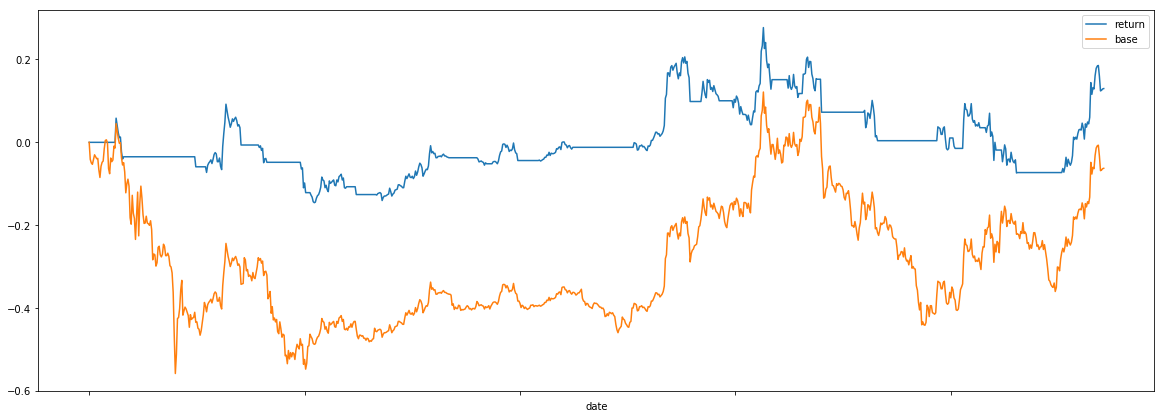

In [115]:
df_order['return'] = np.log(df_order['price'] / Cash)
df_order['base'] = np.log(df_order['close'] / df_order['close'][0])
df_order[['return', 'base']].plot(figsize=(20, 7))

在股票交易的时候，一般会有佣金、印花税、过户费等费用。另外，因为在交易的时候存在排队也网络延迟现象，往往价格并不能按指定的价格成交。这些情况这里暂时不考虑。有兴趣的同学可以加入“大树交流基地”微信群讨论。

---
关注“大树投研”公众号，回复关键字“入门指南”，获得与视频相关的文件、源代码等资料！